In [1]:
import torch
from torchvision import datasets, transforms
from collections import OrderedDict
from multiae import mcVAE, DVCCA
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

### Load the MNIST data

In [2]:
MNIST_1 = datasets.MNIST('./data/MNIST', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ]))
MNIST_2 = datasets.MNIST('./data/MNIST', train=True, download=True, transform=transforms.Compose([
        transforms.ToTensor(),        
    ]))

data_1 = MNIST_1.train_data.reshape(-1, 784).float() / 255.
target = MNIST_1.train_labels
data_2 = MNIST_2.train_data.float()
data_2 = torch.rot90(data_2, 1, [1, 2])
data_2 = data_2.reshape(-1,784)/255.

MNIST_1 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ]))
MNIST_2 = datasets.MNIST('./data/MNIST', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),        
    ]))

data_test_1 = MNIST_1.test_data.reshape(-1, 784).float() / 255.
target_test = MNIST_1.test_labels.numpy()
data_test_2 = MNIST_2.test_data.float() / 255.
data_test_2 = torch.rot90(data_test_2, 1, [1, 2])
data_test_2 = data_test_2.reshape(-1,784)


/home/alejandra/anaconda3/envs/my_mvm_nb/lib/python3.8/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/alejandra/anaconda3/envs/my_mvm_nb/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/alejandra/anaconda3/envs/my_mvm_nb/lib/python3.8/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/alejandra/anaconda3/envs/my_mvm_nb/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


### Define parameters

In [3]:
input_dim=[784, 784]
max_epochs = 10
batch_size = 2000
latent_dim = 2

### Define models

In [20]:
mcvae = mcVAE(
        cfg="./config/example_mnist.yaml",
        input_dim=input_dim,
        z_dim=latent_dim,
    )
dvcca = DVCCA(
        cfg="./config/example_mnist.yaml",
        input_dim=input_dim,
        z_dim=latent_dim,
    )


Global seed set to 42
Global seed set to 42


MODEL:  mcVAE
model:
  use_GPU: false
  save_model: true
  seed_everything: true
  seed: 42
  z_dim: 2
  learning_rate: 0.001
  sparse: false
  threshold: 0.2
  beta: 1
  
datamodule:
  _target_: multiae.base.dataloaders.MultiviewDataModule
  batch_size: null
  is_validate: true
  train_size: 0.9
  
encoder:
  _target_: multiae.models.layers.VariationalEncoder
  hidden_layer_dim:
  - 512
  - 256
  bias: true
  enc_dist:
    _target_: multiae.base.distributions.Normal
  non_linear: true
  
decoder:
  _target_: multiae.models.layers.VariationalDecoder
  hidden_layer_dim:
  - 512
  - 256
  bias: true
  dec_dist:
    _target_: multiae.base.distributions.Normal
  non_linear: true
  init_logvar: -3
  
trainer:
  _target_: pytorch_lightning.Trainer
  gpus: 0
  max_epochs: 10
  deterministic: false
  log_every_n_steps: 2
  resume_from_checkpoint: null
  
callbacks:
  model_checkpoint:
    _target_: pytorch_lightning.callbacks.ModelCheckpoint
    monitor: val_loss
    mode: min
    save_last: t

### Train the models

In [21]:

mcvae.fit(data_1, data_2, max_epochs=max_epochs, batch_size=batch_size)
dvcca.fit(data_1, data_2, max_epochs=max_epochs, batch_size=batch_size)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name     | Type       | Params
----------------------------------------
0 | encoders | ModuleList | 1.1 M 
1 | decoders | ModuleList | 1.1 M 
----------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.557     Total estimated model params size (MB)
/home/alejandra/anaconda3/envs/my_mvm_nb/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /home/alejandra/workspace/refactor/multiAE2/examples/outputs/mcVAE/2022-08-18_1506 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 139.654


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 218.468 >= min_delta = 0.001. New best score: -78.814


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 114.365 >= min_delta = 0.001. New best score: -193.179


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 84.404 >= min_delta = 0.001. New best score: -277.583


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 85.212 >= min_delta = 0.001. New best score: -362.796


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 79.778 >= min_delta = 0.001. New best score: -442.574


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 71.938 >= min_delta = 0.001. New best score: -514.512


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 74.572 >= min_delta = 0.001. New best score: -589.084


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 66.959 >= min_delta = 0.001. New best score: -656.043


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 57.202 >= min_delta = 0.001. New best score: -713.244
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name             | Type       | Params
------------------------------------------------
0 | encoders         | ModuleList | 534 K 
1 | private_encoders | ModuleList | 1.1 M 
2 | decoders         | ModuleList | 1.1 M 
------------------------------------------------
2.7 M     Trainable params
0         Non-trainable params
2.7 M     Total params
10.698    Total estimated model params size (MB)
/home/alejandra/anaconda3/envs/my_mvm_nb/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:631: UserWarning: Checkpoint directory /home/alejandra/workspace/refactor/multiAE2/examples/outputs/DVCCA/2022-08-18_1509 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 83.327


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 79.722 >= min_delta = 0.001. New best score: 3.605


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 31.926 >= min_delta = 0.001. New best score: -28.321


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 50.062 >= min_delta = 0.001. New best score: -78.383


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

### Create latent plots - how well does the latent space separate MNIST labels?

In [26]:
mcvae_latent = mcvae.predict_latents(data_test_1, data_test_2)
dvcca_latent = dvcca.predict_latents(data_test_1, data_test_2)

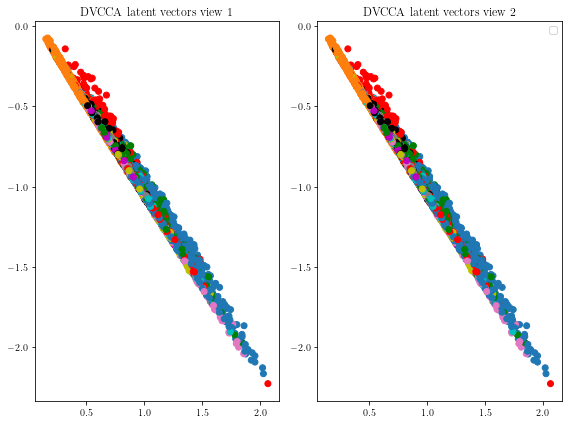

In [27]:
colors =        {0: 'tab:blue',
                 1:'tab:orange',
                 2: 'r',
                 3: 'c',
                 4: 'm',
                 5: 'y',
                 6: 'g',
                 7: 'k',
                 8: 'tab:pink',
                 9: 'tab:gray'
                 }
fig=plt.figure(figsize=(8,6)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(dvcca_latent[0][:,0], dvcca_latent[0][:,1], c=pd.Series(target_test).map(colors))
ax1.set_title('DVCCA latent vectors view 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(dvcca_latent[1][:,0], dvcca_latent[1][:,1], c=pd.Series(target_test).map(colors))
ax2.set_title('DVCCA latent vectors view 2')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.show()

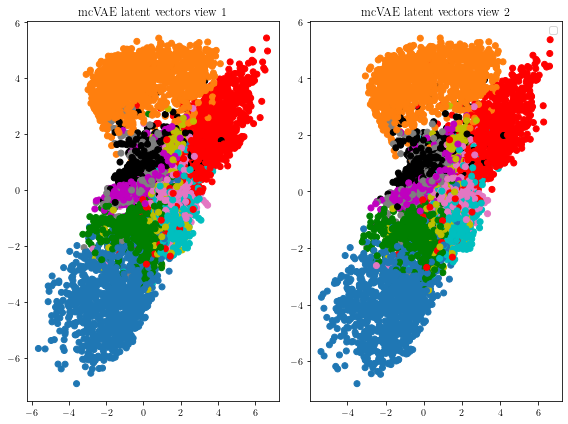

In [28]:
fig=plt.figure(figsize=(8,6)) 
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(mcvae_latent[0][:,0], mcvae_latent[0][:,1], c=pd.Series(target_test).map(colors))
ax1.set_title('mcVAE latent vectors view 1')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(mcvae_latent[1][:,0], mcvae_latent[1][:,1], c=pd.Series(target_test).map(colors))
ax2.set_title('mcVAE latent vectors view 2')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.tight_layout()
plt.show()

### mcVAE reconstruction example

In [29]:
pred = mcvae.predict_reconstruction(data_1, data_2)

### Reconstruction plots - how well can the VAE do same view reconstruction?

In [30]:
data_sample = data_1[20]
#indices: view 1 latent, view 1 decoder, sample 21
pred_sample = pred[0][0][20]

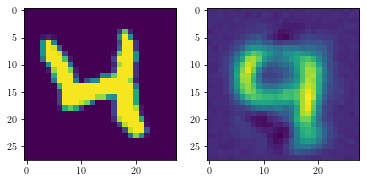

In [31]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))

### Reconstruction plots - how well can the VAE do cross view reconstruction?

In [32]:
data_sample = data_1[20]
#indices: view 1 latent, view 2 decoder, sample 21
pred_sample = pred[1][0][20]

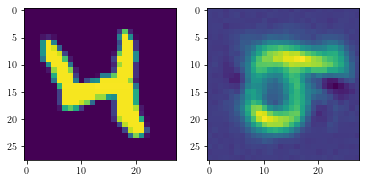

In [33]:
fig, axarr = plt.subplots(1, 2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
axarr[0].imshow(data_sample.reshape(28,28))
axarr[1].imshow(pred_sample.reshape(28,28))